### GA analysis 1
Nb to analytze the GA results

In [18]:
using PyCall
using DataFrames
using Statistics
using Seaborn

rootdir = "/home/stephane/Science/ALMA/ArrayConfig/GASS"
#rootdir = "/home/stephane/alma/ArrayConfig/GASS"

push!(LOAD_PATH,"$rootdir/master/src")
using GASS
using Printf


import Random
import JLD

np= pyimport("numpy")

## directory
datadir = "$rootdir/master/data"
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/test"

cd(wdir)

In [19]:
filename= "random-iter-1.jld"
dat= JLD.load(filename)
niter= length(dat["gass"])
popsize= size(dat["gass"][1].score)[1]

println(dat["gass"][1].score)

[0.722384, -0.372015, -0.612414, -0.651592, -0.657559, -0.802662, -0.823198, -0.608836, -0.889458, -1.03106, -0.694915, -1.12428, -0.906694, -0.995955, -0.990147, -0.765361, -0.652174, -1.04994, -0.844212, -1.02037, -0.90067, -0.863568, -0.773966, -1.17042, -0.972043, -0.920693, -0.721411, -0.673409, -0.896692, -1.01046, -0.924606, -0.878013, -0.95322, -0.668677, -0.888448, -0.968317, -1.02016, -1.15144, -0.912486, -1.11224, -0.927504, -0.959212, -0.885657, -0.727183, -0.899405, -0.863641, -0.853567, -0.661277, -0.675386, -0.71057, -1.0745, -1.23953, -0.637159, -1.34297, -0.693839, -0.606787, -0.898453, -0.687968, -1.14584, -1.1123, -1.13308, -0.920636, -0.722071, -1.38387, -1.25176, -0.753846, -1.27444, -0.91949, -0.879695, -0.674371, -0.849142, -0.815762, -1.05935, -0.744222, -1.5123, -1.05058, -0.810481, -0.960222, -1.04782, -1.16647, -0.974965, -0.635066, -1.00436, -0.887808, -0.851586, -0.842719, -0.605245, -0.872835, -1.14865, -0.985979, -1.20023, -0.971426, -0.750417, -1.00542, 

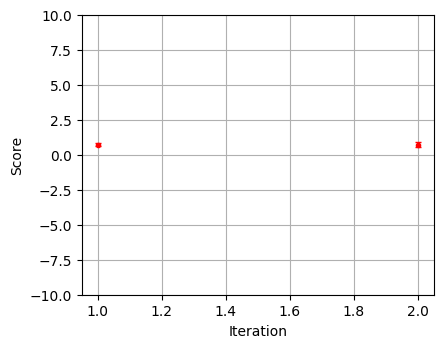

In [20]:
sc= zeros(niter)
time= zeros(niter)
sc_err= zeros(niter)

for i in 1:niter
    time[i]= i
    sc[i]= mean(dat["gass"][i].score[1])
    sc_err[i]= std(dat["gass"][i].score)
end


fig = figure(figsize=(10,8))

ax = subplot(221)
grid("on") 
plot(time, sc, ".r", markersize = 1)
errorbar(time, sc  ,yerr=  sc_err ./ 2 , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax.set_ylim([-10.0, 10.0])
xlabel("Iteration")
ylabel("Score")

show()